### 1. 
В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

churn_analysis.csv
Измерены следующие признаки:

state — штат США
account_length — длительность использования аккаунта
area_code — деление пользователей на псевдорегионы, использующееся в телекоме
intl_plan — подключена ли у пользователя услуга международного общения
vmail_plan — подключена ли у пользователя услуга голосовых сообщений
vmail_message — количество голосых сообщений, который пользователь отправил / принял
day_calls — сколько пользователь совершил дневных звонков
day_mins — сколько пользователь проговорил минут в течение дня
day_charge — сколько пользователь заплатил за свою дневную активность
eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
custserv_calls — сколько раз пользователь позвонил в службу поддержки
treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
mes_estim — оценка интенсивности пользования интернет мессенджерами
churn — результат оттока: перестал ли абонент пользоваться услугами оператора
Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции

scipy.stats.chi2_contingency(subtable, correction=False)
Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Обязательно выставьте correction=False (о том, что это значит, вы узнаете из следующих вопросов).

Сколько достигаемых уровней значимости оказались меньше, чем α=0.05?

### 3. 
В основе критерия xи-квадрат лежит предположение о том, что если верна нулевая гипотеза, то дискретное биномиальное распределение данных по клеткам в таблице сопряженности может быть аппроксимировано с помощью непрерывного распределения xи-квадрат. Однако точность такой аппроксимации существенно зависит от суммарного количества наблюдений и их распределения в этой таблице (отсюда и ограничения при использовании критерия xи-квадрат).

Одним из способов коррекции точности аппроксимации является поправка Йетса на непрерывность. Эта поправка заключается в вычитании константы 0.5 из каждого модуля разности наблюденного Oi и ожидаемого Ei значений, то есть, статистика с такой поправкой выглядит так:
χ2Yates=∑i=1N(|Oi−Ei|−0.5)2Ei.
Такая поправка, как несложно догадаться по формуле, как правило, уменьшает значение статистики χ2, то есть увеличивает достигаемый уровень значимости.

Эта поправка обычно используется для таблиц сопряженности размером 2x2 и для небольшого количества наблюдений. Такая поправка, однако, не является серебрянной пулей, и часто критикуется за то, что статистический критерий при ее использовании становится слишком консервативным, то есть часто не отвергает нулевую гипотезу там, где она неверна (совершает ошибку II рода).

Полезно знать, что эта поправка часто включена по умолчанию (например, в функции scipy.stats.chi2_contingency) и понимать ее влияние на оценку достигаемого уровня значимости.

Проведите те же самые сравнения, что и в вопросе №1, только с включенной коррекцией

scipy.stats.chi2_contingency(subtable, correction=True)
и сравните полученные результаты, отметив все верные варианты.

### 4. 
Что если у нас мало данных, мы не хотим использовать аппроксимацию дискретного распределения непрерывным и использовать сомнительную поправку, предположения критерия xи-квадрат не выполняются, а проверить гипотезу о том, что данные принадлежат одному распределению, нужно ?

В таком случае прибегают к так называемому точному критерию Фишера. Этот критерий не использует приближений и в точности вычисляет значение достигаемого уровня значимости используя комбинаторный подход.

Пусть у нас есть таблица сопряженности 2x2:

Группа 1	Группа 2	Σ
Воздействие 1	a	b	a+b
Воздействие 2	c	d	c+d
Σ	a+c	b+d	n=a+b+c+d
Тогда вероятность получить именно такие a,b,c,d при фиксированных значениях сумм по строкам и по столбцам) задается выражением

p=(a+ba)(c+dc)(na+c)=(a+b)! (c+d)! (a+c)! (b+d)!a!  b!  c!  d!  n!.
В числителе этой дроби стоит суммарное количество способов выбрать a и c из a+b и c+d соответственно. А в знаменателе — количество способов выбрать число объектов, равное сумме элементов первого столбца a+c из общего количества рассматриваемых объектов n.

Чтобы посчитать достигаемый уровень значимости критерия Фишера, нужно перебрать все возможные значения a,b,c,d, в клетках этой таблицы так, чтобы построковые и постолбцовые суммы не изменились. Для каждого такого набора a,b,c,d нужно вычислить значение pi по формуле выше и просуммировать все такие значения pi, которые меньше или равны p, которое мы вычислили по наблюдаемым значениям a,b,c,d.

Понятно, что такой критерий вычислительно неудобен в силу большого количества факториалов в формуле выше. То есть даже при небольших выборках для вычисления значения этого критерия приходится оперировать очень большими числами. Поэтому данным критерием пользуются обычно только для таблиц 2x2, но сам критерий никак не ограничен количеством строк и столбцов, и его можно построить для любой таблицы n×m.

Посчитайте для каждой пары штатов, как и в первом задании, достигаемый уровень значимости с помощью точного критерия Фишера и сравните получившиеся значения с двумя другими подходами, описанными выше.

Точный критерий Фишера удобно вычислять с помощью функции
scipy.stats.fisher_exact
которая принимает на вход таблицу сопряженности 2x2.

### 5. 
Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.

### 6. 
Еще раз рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Спирмена между этими признаками на всех данных, ее значимость.

Отметьте все верные утверждения.

### 8. 
Посчитайте значение коэффицента корреляции Крамера между двумя признаками: штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

### 9. 
Вы прослушали большой курс и к текущему моменту обладете достаточными знаниями, чтобы попытаться самостоятельно выбрать нужный метод / инструмент / статистический критерий и сделать правильное заключение.

В этой части задания вам нужно будет самостоятельно решить, с помощью каких методов можно провести анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1).

Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

Не забудьте про поправку на множественную проверку! И не пользуйтесь односторонними альтернативами, поскольку вы не знаете, к каким действительно последствиям приводят тестируемые методы (treatment = 0, treatment = 2) !

In [46]:
import numpy as np
import pandas as pd
import statsmodels
import scipy as sc
from statsmodels.stats.weightstats import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('churn_analysis.csv', index_col=0)

In [4]:
data.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [10]:
data['churn'].value_counts()

False.    2850
True.      483
Name: churn, dtype: int64

In [12]:
data1 = data[data['treatment'] == 1]

In [14]:
data['state'].describe()

count     3333
unique      51
top         WV
freq       106
Name: state, dtype: object

In [15]:
pt = data.loc[data.treatment == 1, :].pivot_table(index="state", 
     values="area_code", columns="churn", aggfunc = len, fill_value=0)

In [16]:
pt

churn,False.,True.
state,,
AK,19,1
AL,25,5
AR,11,5
AZ,17,2
CA,10,5
CO,17,5
CT,25,5
DC,18,1
DE,16,1


In [17]:
pt.loc[["CT", "DC"], :]

churn,False.,True.
state,,
CT,25,5
DC,18,1


In [18]:
pt.iloc[[1, 2], :]

churn,False.,True.
state,,
AL,25,5
AR,11,5


In [27]:
chi2, p, dof, expected = sc.stats.chi2_contingency(pt, correction=False)
p

0.70975900427784788

In [34]:
n = 0
total = 0
p_values1 = np.zeros(1275)
k = 0
for i in xrange(pt.shape[0] - 1):
    for j in xrange(i + 1, pt.shape[0]):
        subtable = pt.iloc[[i, j], :]        
        total += 1
        chi2, p, dof, expected = sc.stats.chi2_contingency(subtable, correction=False)
        p_values1[k] = p
        k += 1
        if p < 0.05:
            n += 1
print n

34


In [35]:
n = 0
total = 0
p_values2 = np.zeros(1275)
k = 0
for i in xrange(pt.shape[0] - 1):
    for j in xrange(i + 1, pt.shape[0]):
        subtable = pt.iloc[[i, j], :]        
        total += 1
        chi2, p, dof, expected = sc.stats.chi2_contingency(subtable, correction=True)
        p_values2[k] = p
        k += 1
        if p < 0.05:
            n += 1
print n

0


In [36]:
p_values1.mean(), p_values2.mean()

(0.50182737987391657, 0.66405663820510508)

In [37]:
n = 0
total = 0
p_values3 = np.zeros(1275)
k = 0
for i in xrange(pt.shape[0] - 1):
    for j in xrange(i + 1, pt.shape[0]):
        subtable = pt.iloc[[i, j], :]        
        total += 1
        odds, p = sc.stats.fisher_exact(subtable)
        p_values3[k] = p
        k += 1
        if p < 0.05:
            n += 1
print n

10


In [38]:
p_values1.mean(), p_values2.mean(), p_values3.mean()

(0.50182737987391657, 0.66405663820510508, 0.64833830600206888)

In [44]:
data.corr()['day_calls']['mes_estim']

-0.051794350587572591

In [45]:
sc.stats.pearsonr(data['day_calls'], data['mes_estim'])

(-0.051794350587572625, 0.0027798836869758091)

In [46]:
sc.stats.spearmanr(data['day_calls'], data['mes_estim'])

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170545)

In [13]:
data0 = data[data['treatment'] == 0]['churn']
data1 = data[data['treatment'] == 1]['churn']
data2 = data[data['treatment'] == 2]['churn']

In [11]:
data1.head()

0     False.
3     False.
8     False.
12    False.
17    False.
Name: churn, dtype: object

## Task 7

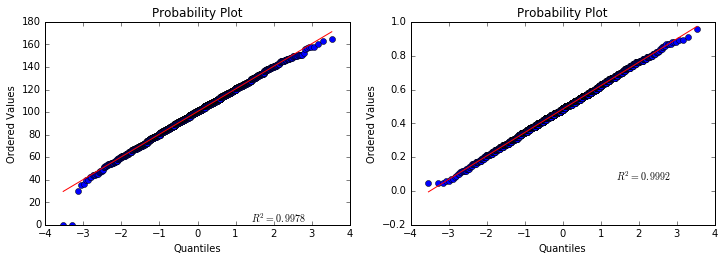

In [47]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data['day_calls'], dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data['mes_estim'], dist="norm", plot=pylab)
pylab.show()

## Task 9 Z-criterion

In [23]:
d0 = np.where(data0[:] == 'False.', 0, 1)    # method1
d1 = np.where(data1[:] == 'False.', 0, 1)    # control
d2 = np.where(data2[:] == 'False.', 0, 1)    # method2

In [24]:
d0.sum(), float(d0.sum())/len(d0)

(165, 0.14563106796116504)

In [25]:
d1.sum(), float(d1.sum())/len(d1)

(180, 0.1640838650865998)

In [26]:
d2.sum(), float(d2.sum())/len(d2)

(138, 0.12511332728921123)

In [27]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = sc.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [28]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [29]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sc.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sc.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sc.stats.norm.cdf(z_stat)

In [34]:
print "95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(d0, d1, alpha=0.025)

95% confidence interval for a difference between proportions: [-0.052802, 0.015896]


In [31]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(d0, d1))

p-value: 0.228331


In [35]:
print "95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(d2, d1, alpha=0.025)

95% confidence interval for a difference between proportions: [-0.072537, -0.005404]


In [32]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(d2, d1))

p-value: 0.009348


In [36]:
print "95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(d0, d2, alpha=0.025)

95% confidence interval for a difference between proportions: [-0.011890, 0.052926]


In [37]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(d0, d2))

p-value: 0.156425


## Fischer

In [38]:
pt2 = data.pivot_table(index="treatment", 
     values="area_code", columns="churn", aggfunc = len, fill_value=0)

In [39]:
pt2

churn,False.,True.
treatment,,
0,968,165
1,917,180
2,965,138


In [41]:
p_values = np.zeros(3)
for i in xrange(pt2.shape[0] - 1):
    for j in xrange(i + 1, pt2.shape[0]):
        subtable = pt2.iloc[[i, j], :]                
        odds, p = sc.stats.fisher_exact(subtable)        
        print subtable
        print p

churn      False.  True.
treatment               
0             968    165
1             917    180
0.241587339358
churn      False.  True.
treatment               
0             968    165
2             965    138
0.173935660449
churn      False.  True.
treatment               
1             917    180
2             965    138
0.0108003638995
